# Anomaly Detection

# Mary Donovan Martello

## Part 4:  Feature Selection

In [2]:
# Importing required libraries
library(dplyr)
library(caret)
library(ggplot2)
library(caTools)
library(ROSE)
library(smotefamily)
library(rpart)
library(rpart.plot)
library(psych)
library(ltm)
library(corrplot)
library(e1071)
library(data.table)
library(Boruta)
library(glmnet)

suppressMessages(library(dplyr))
suppressMessages(library(caTools))
suppressMessages(library(ROSE))
suppressMessages(library(smotefamily))
suppressMessages(library(rpart.plot))
suppressMessages(library(psych))
suppressMessages(library(ltm))
suppressMessages(library(corrplot))
suppressMessages(library(e1071))
suppressMessages(library(data.table))
suppressMessages(library(Boruta))
suppressMessages(library(glmnet))

In [3]:
#Loading the dataset
df<-read.csv("underCreditFraud.csv")

In [6]:
# Convert class to a factor variable
df$Class <- factor(df$Class, levels =  c(0,1))

In [8]:
df%>%head()

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0.7060950,-7.1611496,-9.5276960,-0.7676500,0.8197139,2.68075317,-3.6924339,-3.2287123,0.03399092,0.4791680,...,-1.41172852,-0.7350073,-4.29441913,0.46818309,0.9408568,-0.2294164,-0.16228142,12.31462947,1.0510166,0
-0.2961341,-1.3464797,2.0041061,-0.2110211,-0.0730863,0.38309537,-0.8884684,1.7183649,-1.19713298,2.9977536,...,-0.95558200,0.7269934,-0.14126942,0.55569662,-0.4104047,-1.3103510,0.03389793,-3.87525466,-0.3460722,0
-0.3700262,0.6153610,-0.1503378,0.5141724,0.3644025,-0.54525864,-0.1194161,-0.3387883,-0.05926210,-1.0561095,...,-0.66424580,-1.2722529,0.28351344,0.05772905,0.2803584,-1.2135285,0.20033985,0.13881848,-0.1853094,0
0.4064833,0.9763179,0.1727092,-0.0280621,2.6135335,0.07388474,0.5926719,-0.4442438,0.17150681,-0.2571146,...,0.24104838,0.8434608,0.25318808,0.75303432,-0.2214362,0.1178566,0.02163840,-0.09113734,-0.3532288,0
1.0521603,0.0676940,0.4679862,0.4375608,0.7541529,0.16313154,-0.4026051,0.4801191,-0.14077926,-0.5095993,...,-0.24041667,-0.5226028,0.08890892,-0.10752242,-1.6660149,1.2531235,0.40241708,0.54520090,-0.3172860,0
-0.3663622,0.6414456,-0.3517435,0.3677919,-0.5421759,-0.68028328,-0.2973385,-0.4990502,0.03933774,-1.0176385,...,-0.03724996,-0.3734531,0.27131534,0.34390779,0.1640336,-1.0796544,0.03568452,0.04686590,-0.2058996,0


In [9]:
dim(df)

[1] 984  31

In [10]:
# Count the missing values
sum(is.null(df))

[1] 0

In [11]:
# Get the distribution of fraud and non-fraud transactions in the dataset
table(df$Class)


  0   1 
492 492 

In [12]:
# Get the percentage of fraud and legit transactions in the datasets
prop.table(table(df$Class))


  0   1 
0.5 0.5 

In [13]:
# turns off scientific notation
options(scipen = 999)

### Scale Data

In [ ]:
# remove the target variable
numDf <- df[, (1:30)]

# scale
scaledDf <- scale(numDf, center = TRUE, scale = TRUE)

# add target variable back to the df
Class <- df$Class
Class <- as.data.table(Class)
df <- cbind(scaledDf, Class)

### Feature Selection

In [14]:
# Remove Zero and Near Zero-Variance Predictors
#    install.packages("caret")
#library(caret)
nzv <- nearZeroVar(df)
nzv

integer(0)

In [15]:
str(nzv)

 int(0) 


In [16]:
str(-nzv)

 int(0) 


ROC curve variable importance

  only 20 most important variables shown (out of 30)

    Importance
V14     0.9495
V4      0.9458
V12     0.9369
V11     0.9195
V10     0.9180
V3      0.9139
V2      0.8603
V16     0.8475
V7      0.8355
V9      0.8322
V17     0.8073
V1      0.7883
V6      0.7624
V21     0.7443
V18     0.7377
V5      0.6983
V27     0.6979
V8      0.6580
V20     0.6501
V19     0.6408


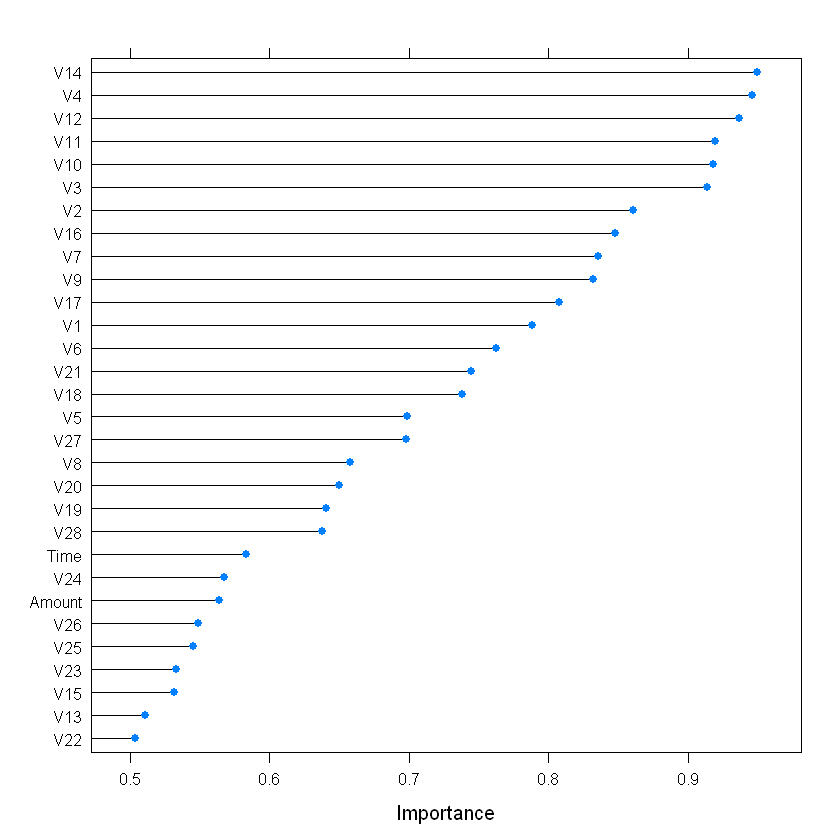

In [17]:
# Rank Features By Importance
#  Learning Vector Quantization (LVQ) model. 
# prepare training scheme
control <- trainControl(method="repeatedcv", number=10, repeats=3)
# train the model
modelLVQ <- train(Class~., data=df, method="lvq", preProcess="scale", trControl=control)
# estimate variable importance
importance <- varImp(modelLVQ, scale=FALSE)
# summarize importance
print(importance)
# plot importance
plot(importance)

In [ ]:
#  Recursive Feature Elimination 
# A Random Forest algorithm is used on each iteration to evaluate the model. The algorithm is configured to explore all possible subsets of the attributes.
# https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/


In [18]:
dim(df)

[1] 984  31


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.8393 0.6787    0.03536 0.07073         
         2   0.9187 0.8374    0.02869 0.05739         
         3   0.9330 0.8659    0.03026 0.06053         
         4   0.9451 0.8903    0.02873 0.05744         
         5   0.9461 0.8923    0.02742 0.05484         
         6   0.9421 0.8842    0.02693 0.05389         
         7   0.9411 0.8822    0.02725 0.05449         
         8   0.9421 0.8842    0.02973 0.05946         
         9   0.9431 0.8862    0.02944 0.05887         
        10   0.9370 0.8740    0.02973 0.05945         
        11   0.9441 0.8883    0.02984 0.05966         
        12   0.9431 0.8862    0.02824 0.05645         
        13   0.9462 0.8924    0.02814 0.05627         
        14   0.9451 0.8903    0.02438 0.04877         
        15   0.9472 0.8944    0.02511 0.05022     

[1] "V4"     "V14"    "V10"    "V12"    "V17"    "V11"    "V3"     "V19"   
 [9] "V16"    "V20"    "Amount" "V8"     "V23"    "V7"     "V21"    "V1"

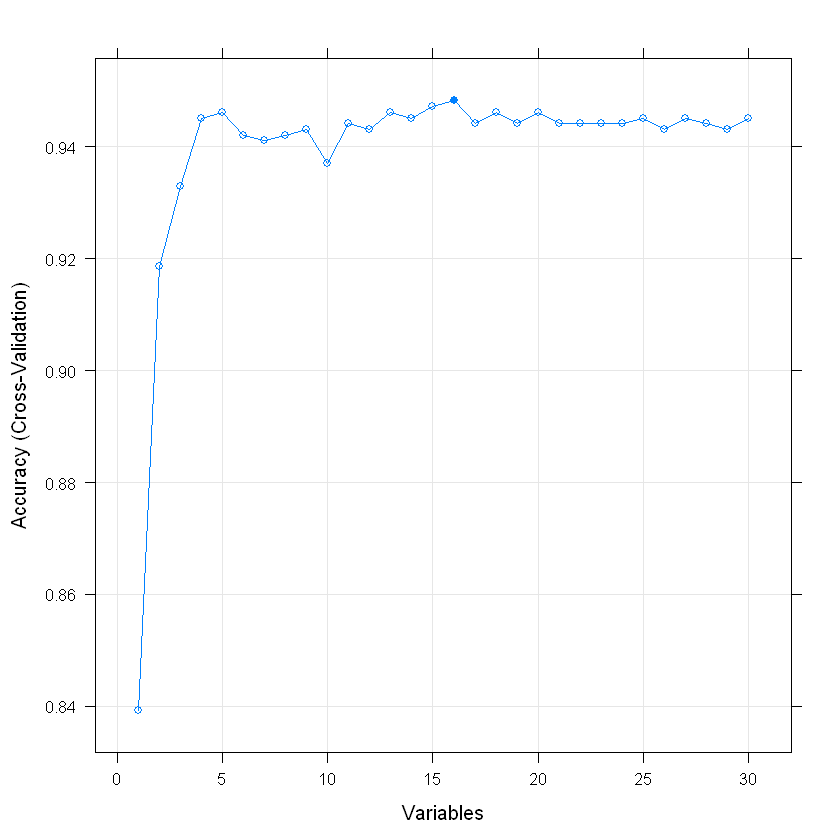

In [19]:
# define the control using a random forest selection function
control <- rfeControl(functions=rfFuncs, method="cv", number=10)
# run the RFE algorithm
results <- rfe(df[,1:30], df[,31], sizes=c(1:30), rfeControl=control)
# summarize the results
print(results)
# list the chosen features
predictors(results)
# plot the results
plot(results, type=c("g", "o"))


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.8364 0.6728    0.05360 0.10718         
         2   0.9238 0.8476    0.02910 0.05826         
         3   0.9350 0.8700    0.02532 0.05066         
         4   0.9411 0.8821    0.02704 0.05411        *
         5   0.9391 0.8781    0.03165 0.06334         
        10   0.9350 0.8700    0.03912 0.07831         
        15   0.9380 0.8760    0.03589 0.07184         
        18   0.9370 0.8740    0.03630 0.07267         
        30   0.9370 0.8740    0.03439 0.06884         

The top 4 variables (out of 4):
   V4, V14, V10, V12



[1] "V4"  "V14" "V10" "V12"

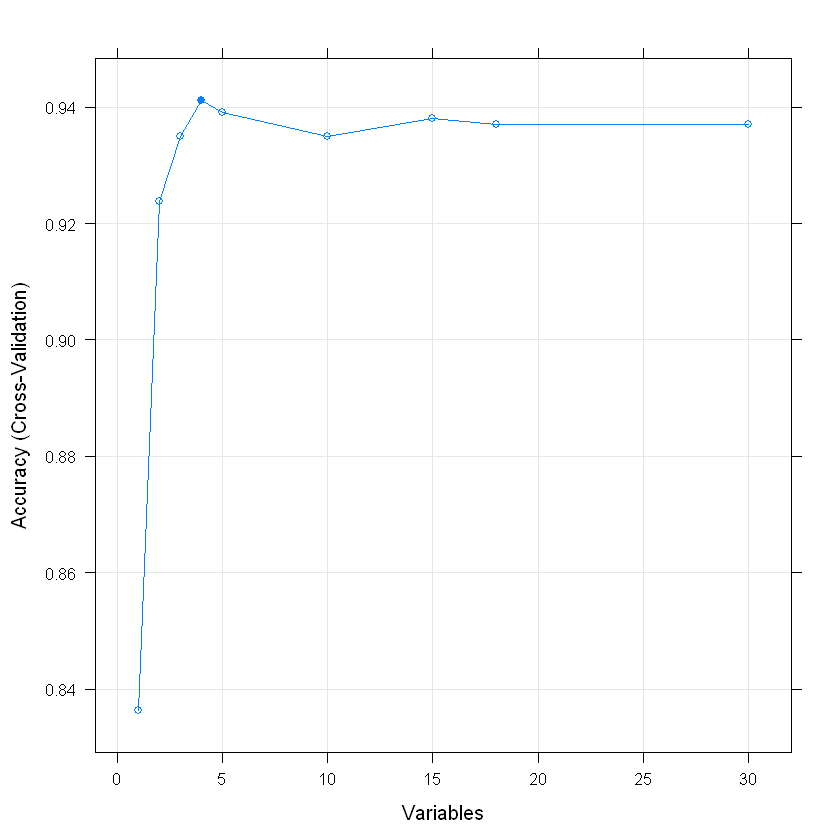

In [36]:
# define the control using a random forest selection function
control <- rfeControl(functions=rfFuncs, method="cv", number=10)
# run the RFE algorithm
# The sizes determines the number of most important features the rfe should iterate. Below, I have set the size as 1 to 5, 10, 15 and 18.
subsets <- c(1:5, 10, 15, 18)
results <- rfe(df[,1:30], df[,31], sizes=subsets, rfeControl=control)
# summarize the results
print(results)
# list the chosen features
predictors(results)
# plot the results
plot(results, type=c("g", "o"))

**Boruta**

In [27]:
# Perform Boruta search
boruta_output <- Boruta(Class ~ ., data=na.omit(df), doTrace=0)

In [28]:
names(boruta_output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [29]:
# Get significant variables including tentatives
boruta_signif <- getSelectedAttributes(boruta_output, withTentative = TRUE)
print(boruta_signif) 

 [1] "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"     "V8"    
 [9] "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"    "V16"   
[17] "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"    "V25"   
[25] "V26"    "V27"    "V28"    "Amount"


In [30]:
# Do a tentative rough fix
roughFixMod <- TentativeRoughFix(boruta_output)
boruta_signif <- getSelectedAttributes(roughFixMod)
print(boruta_signif)

 [1] "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"     "V8"    
 [9] "V9"     "V10"    "V11"    "V12"    "V14"    "V16"    "V17"    "V18"   
[17] "V19"    "V20"    "V21"    "V22"    "V23"    "V25"    "V26"    "V27"   
[25] "V28"    "Amount"


In [31]:
# Variable Importance Scores
imps <- attStats(roughFixMod)
imps2 = imps[imps$decision != 'Rejected', c('meanImp', 'decision')]
head(imps2[order(-imps2$meanImp), ])  # descending sort

,meanImp,decision
V4,26.66816,Confirmed
V14,24.12718,Confirmed
V10,18.67462,Confirmed
V12,17.27650,Confirmed
V11,14.97228,Confirmed
V17,14.17940,Confirmed


**Lasso Regression**

Warning message:
"executing %dopar% sequentially: no parallel backend registered"

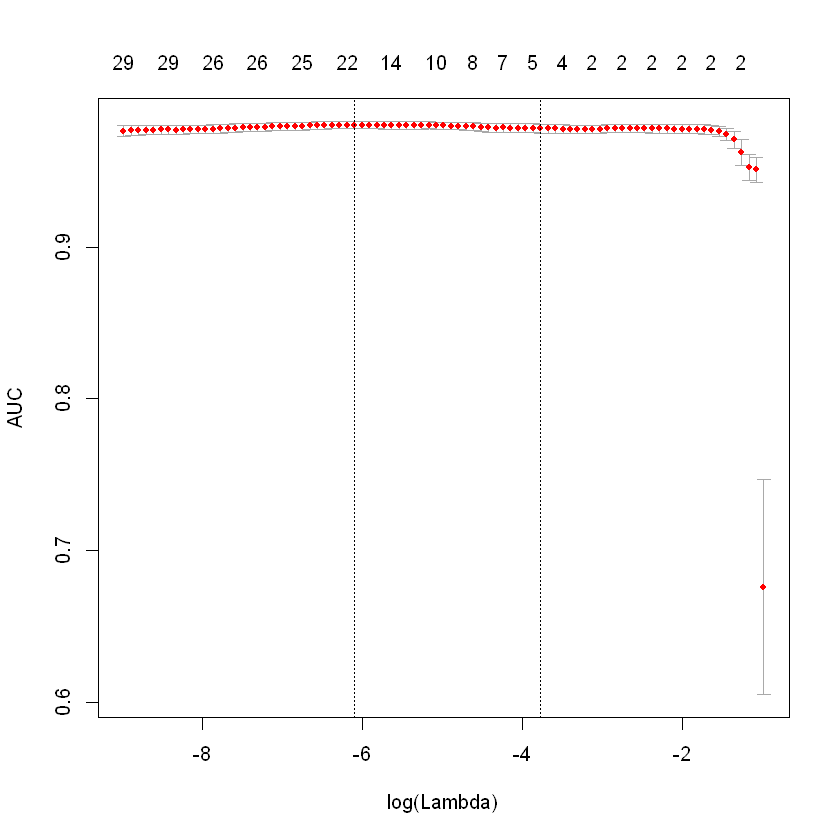

In [34]:
x <- as.matrix(df[,-31]) # all X vars
#y <- as.double(as.matrix(ifelse(df[, 31]=='normal', 0, 1))) # Only Class
y <- df[, 31]

# Fit the LASSO model (Lasso: Alpha = 1)
set.seed(100)
cv.lasso <- cv.glmnet(x, y, family='binomial', alpha=1, parallel=TRUE, standardize=TRUE, type.measure='auc')

# Results
plot(cv.lasso)

In [35]:
#The best lambda value is stored inside 'cv.lasso$lambda.min'

# plot(cv.lasso$glmnet.fit, xvar="lambda", label=TRUE)
cat('Min Lambda: ', cv.lasso$lambda.min, '\n 1Sd Lambda: ', cv.lasso$lambda.1se)
df_coef <- round(as.matrix(coef(cv.lasso, s=cv.lasso$lambda.min)), 2)

# See all contributing variables
df_coef[df_coef[, 1] != 0, ]

Min Lambda:  0.00224807 
 1Sd Lambda:  0.0230097

(Intercept)        Time          V3          V4          V5          V6 
      -2.80       -0.16       -0.07        1.06        0.27       -0.23 
         V8          V9         V10         V11         V12         V13 
      -0.23       -0.05       -0.40        0.17       -0.50       -0.23 
        V14         V15         V18         V19         V20         V22 
      -0.65       -0.04        0.02       -0.01       -0.05        0.12 
        V23         V26         V28      Amount 
       0.03       -0.17       -0.05        0.21

The above output shows what variables LASSO considered important. A high positive or low negative implies more important is that variable.